# Hartree Fock 

# Cálculo autoconsistente Ground State Helio

Darío Mitnik

In [36]:
from numpy import  linspace, zeros, array, pi, sqrt
from scipy.linalg import  eigh , eigvalsh

%matplotlib inline
from matplotlib.pyplot import plot, title, legend, show, axhline, \
                              xlabel, ylabel, axis, figure

In [37]:
nsize = 4
S = zeros((nsize,nsize))  # Overlap
H = zeros((nsize,nsize))  # One-electron Hamiltonian
G = zeros((nsize,nsize))  # Two-electron Operator
F = zeros((nsize,nsize))  # Fock Operator Hij + Gij

# Gaussian Basis  Ci*exp(-Alpha*r^2)
Alpha = zeros((nsize))    
Ci = zeros((nsize))

EnergyGS = []

In [38]:
# Datos Iniciales
Alpha[0] = 0.298073
Alpha[1] = 1.242567
Alpha[2] = 5.782948
Alpha[3] = 38.47497

In [39]:
# Cálculo de Overlaps  Sij=<xi|xj>

def overlap(Alpha,p,q):
    spq = ( pi / (Alpha[p] + Alpha[q]) )**(3./2.)
    
    return spq

for i in range(0,nsize):
    for j in range(i,nsize):        
        S[i,j]=overlap(Alpha,i,j)
        S[j,i]=S[i,j]

S

array([[  1.20975063e+01,   2.91187719e+00,   3.71330014e-01,
          2.30637530e-02],
       [  2.91187719e+00,   1.42134692e+00,   2.99025043e-01,
          2.22459699e-02],
       [  3.71330014e-01,   2.99025043e-01,   1.41564997e-01,
          1.89120383e-02],
       [  2.30637530e-02,   2.22459699e-02,   1.89120383e-02,
          8.24921040e-03]])

In [40]:
# Cálculo de Hamiltoniano Hij=<xi| H |xj>

# Cálculo de Energía Cinética  Tij=<xi|-1/2 D^2 |xj>
def Tkin(Alpha,p,q):
    rnum = 3 * pi**(3./2.) * Alpha[p] * Alpha[q]
    rden =  (Alpha[p] + Alpha[q] )**(5./2.)    
    Tpq = rnum/rden
    return Tpq


# Cálculo de Energía Potencial  Vij=<xi|-Z/r |xj>
def Vpot(Alpha,p,q):
    Vpq = 2 * ( -2*pi )  /  (Alpha[p] + Alpha[q])    
    return Vpq

for i in range(0,nsize):
    for j in range(i,nsize): 
        H[i,j] = Tkin(Alpha,i,j) + Vpot(Alpha,i,j)
        H[j,i] = H[i,j]
        
H

array([[ -1.56704407e+01,  -6.05651235e+00,  -1.75071599e+00,
         -3.03635210e-01],
       [ -6.05651235e+00,  -2.40743875e+00,  -8.71147177e-01,
         -2.36061536e-01],
       [ -1.75071599e+00,  -8.71147177e-01,   1.41492399e-01,
          1.29567990e-03],
       [ -3.03635210e-01,  -2.36061536e-01,   1.29567990e-03,
          3.12776396e-01]])

In [41]:
# Cálculo de Repulsión Interelectrónica 
# Qirjs=<xi(r1)xr(r2)| 1/|r1-r2| |xj(r1)xs(r2)>


# Cálculo de Integral de Repulsión
# Qirjs=<xi(r1)xr(r2)| 1/|r1-r2| |xj(r1)xs(r2)>
def Qirjs(Alpha,i,r,j,s):
    rnum = 2 * pi**(5./2.) 
    sqrsum = sqrt(Alpha[i]+Alpha[j]+Alpha[r]+Alpha[s])
    rden =  (Alpha[i]+Alpha[j])*(Alpha[r]+Alpha[s])*sqrsum    
    Qirjs = rnum/rden    
    return Qirjs

## Iteración Hartree

In [42]:
#Ci = [ 0.14769958,  0.39389831,  0.4108749 ,  0.26131933]

In [54]:
Ci

array([ 0.08704173,  0.52509737,  0.51920929,  0.31233737])

In [55]:
# Acá Itera Hartree

# Esto lleva al elemento de matriz
# Gij = Sum_rs Qirjs Cr Cs

# Cálculo de Elemento de Matriz  Vij=<xi|-Z/r |xj>
# Gij = Sum_rs Qirjs Cr Cs

for i in range(0,nsize):
    for j in range(i,nsize):
        sum = 0.0
        for r in range(0,nsize):
            for s in range(0,nsize):
                sum = sum + Qirjs(Alpha,i,r,j,s)*Ci[r]*Ci[s]
        G[i,j]=sum
        G[j,i]=sum  

In [56]:
G

array([[ 9.31657706,  3.15353154,  0.56481032,  0.04297898],
       [ 3.15353154,  1.77029783,  0.46635437,  0.04151012],
       [ 0.56481032,  0.46635437,  0.23741181,  0.03549034],
       [ 0.04297898,  0.04151012,  0.03549034,  0.0158361 ]])

In [45]:
# Construcción de Operador Fock

for i in range(0,nsize):
    for j in range(i,nsize): 
        F[i,j] = H[i,j] + G[i,j]
        F[j,i] = F[i,j]

In [46]:
F

array([[ -1.56704407e+01,  -6.05651235e+00,  -1.75071599e+00,
         -3.03635210e-01],
       [ -6.05651235e+00,  -2.40743875e+00,  -8.71147177e-01,
         -2.36061536e-01],
       [ -1.75071599e+00,  -8.71147177e-01,   1.41492399e-01,
          1.29567990e-03],
       [ -3.03635210e-01,  -2.36061536e-01,   1.29567990e-03,
          3.12776396e-01]])

In [47]:
# Solución generalized eigenvalues (H-ES)(C)=0
# Sólo Autovalores!

Ener = eigvalsh(F,S,type=1)
Ener

array([ -1.99426616,  -0.14710077,   6.32502944,  59.47036431])

In [48]:
# Solución generalized eigenvalues (H-ES)(C)=0

Ener,coef = eigh(F,S,type=1)
Ci = coef[:,0]
Ci

array([ 0.08704173,  0.52509737,  0.51920929,  0.31233737])

In [49]:
# Normalización de los coeficientes

sum = 0.0
for i in range(0,nsize):
    for j in range(0,nsize):
        sum = sum + Ci[i]*S[i,j]*Ci[j]
for i in range(0,nsize):
    Ci[i] = Ci[i]/sqrt(sum)

In [50]:
Ci

array([ 0.08704173,  0.52509737,  0.51920929,  0.31233737])

In [51]:
# Energía Total

sum = 0.0
for i in range(0,nsize):
    for j in range(0,nsize):
        sum = sum + Ci[i]*Ci[j]*(2.0*H[i,j]+G[i,j])

EnergyGSnew = sum
EnergyGSnew

-3.9885323142089333

In [52]:
EnergyGS.append(EnergyGSnew)

In [53]:
EnergyGS

[-3.9885323142089333]

## Fin Iteración

In [96]:
# Cálculo de la función de onda
    
def psi(Ci,Alpha,x):

    from math import  exp

    nsize = len(Ci) 
    sum = 0.0
    for i in range(0,nsize):
        sum = sum + Ci[i]*exp(-Alpha[i]*x**2)
    return sum

In [97]:
# Generación de la Solución

# array definitions
npts = 500
xmin = 0.0
xmax = 6
dx = (xmax-xmin)/(npts-1)

x = linspace(xmin,xmax,npts)
wave1s = zeros(npts)

for i in range(0,npts):
        wave1s[i] = psi(-Ci,Alpha,x[i])

In [98]:
# Normalization

rsum = 0.0
for i in range(0,npts):
        P1s = x[i]*wave1s[i]
        rsum = rsum +  P1s**2
rsum = rsum * dx
rnorm = 1.0/sqrt(rsum)

isign = 1
if wave1s[2]<0:
    isign = -1

wave1s = wave1s*rnorm*isign

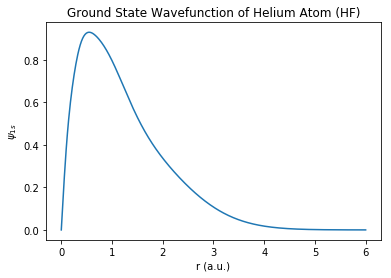

In [99]:
# Ploteo de Solución

plot(x,x*wave1s);
#axis([xmin,xmax,-0.6,0.25]);
title("Ground State Wavefunction of Helium Atom (HF)");
xlabel("r (a.u.)");
ylabel("$\psi_{1s}$");